In [11]:
import laspy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from colorspacious import cspace_converter
import matplotlib as mpl
import scipy 
import seaborn as sns

from pathlib import Path

base_path = Path('.')
list(base_path.glob('T*'))

file_name = "220829GO15D"
#change file name according to flight being analysed

base_dir = "C:/Hobbies/programming/data/"
#file_path = base_dir + file_name + '/' + file_name + "_C_A.las"
#use file_path below for multiple flights on one date and adjust carefully
file_path = "C:/Hobbies/programming/data/220829GO15D/22GOempty/" + file_name + "_EMPTY_C_A.las"

C:\Hobbies\programming\T32\file_220905_T32_datasets_1.csv
521.728
521.7760656934306


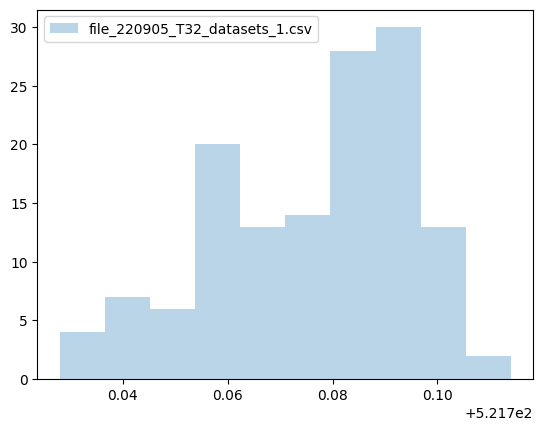

C:\Hobbies\programming\T32\file_220912_50_T32_datasets_1.csv
521.708
521.7646934306568


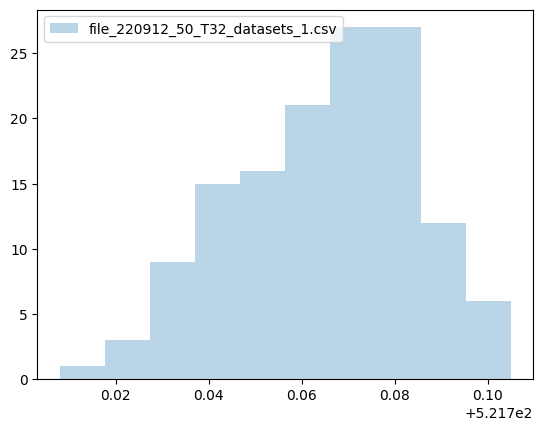

C:\Hobbies\programming\T32\file_220912_T32_datasets_1.csv
521.729
521.7672846715327


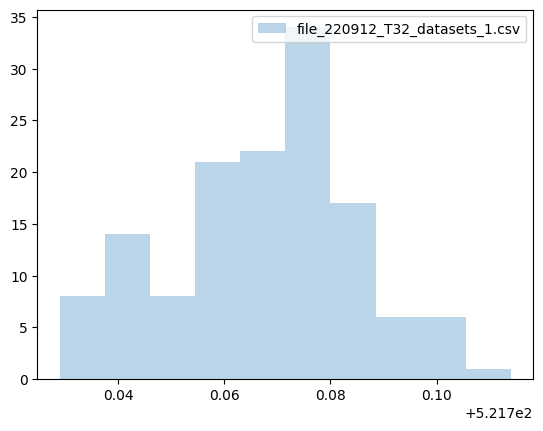

C:\Hobbies\programming\T32\file_220927_3MS_T32_datasets_1.csv
521.593
521.7009854014599


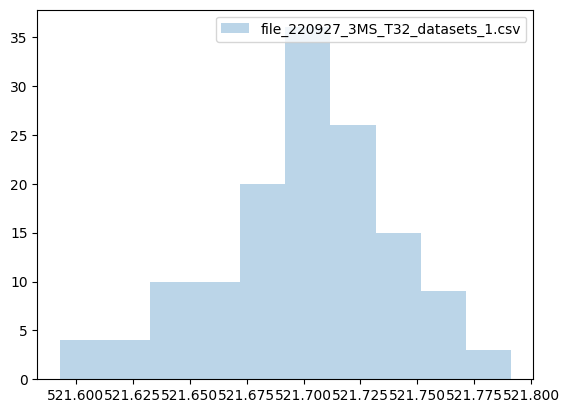

C:\Hobbies\programming\T32\file_220927_4MS_T32_datasets_1.csv
521.549
521.6547518248175


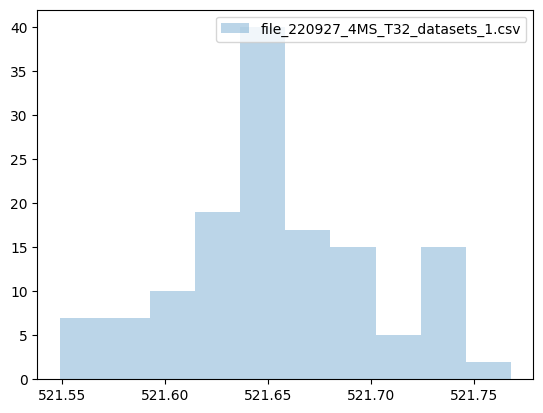

C:\Hobbies\programming\T32\file_221011_T32_datasets_1.csv
521.524
521.6460218978102


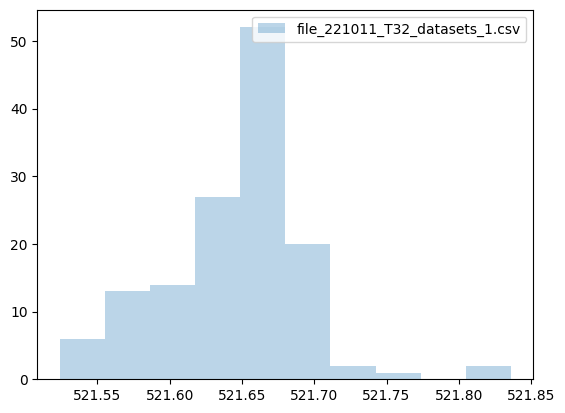

C:\Hobbies\programming\T32\file_221020_60_T32_datasets_1.csv
521.533
521.6994586466164


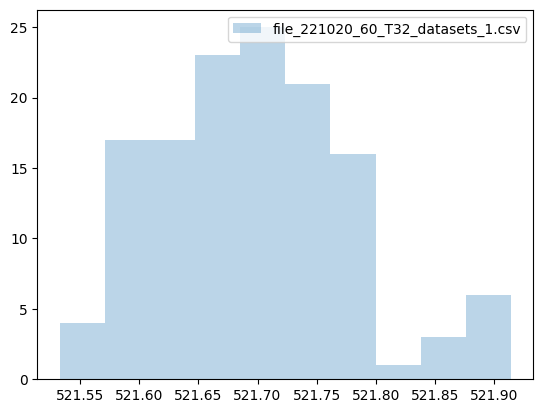

C:\Hobbies\programming\T32\file_221020_T32_datasets_1.csv
521.555
521.6690510948905


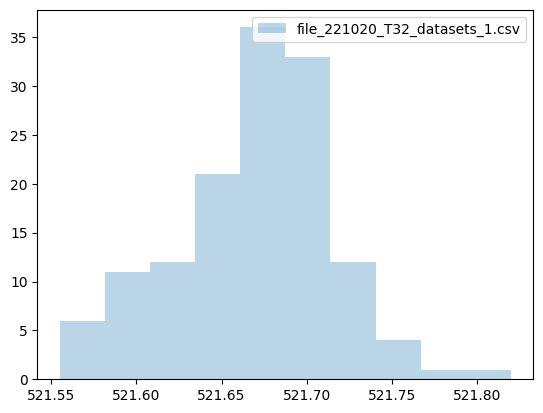

C:\Hobbies\programming\T32\file_221101_T32_datasets_1.csv
521.516
521.6413284671532


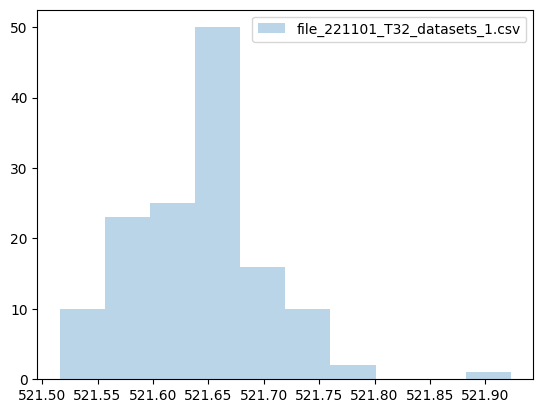

C:\Hobbies\programming\T32\file_221117_T32_datasets_1.csv
521.437
521.5969635036495


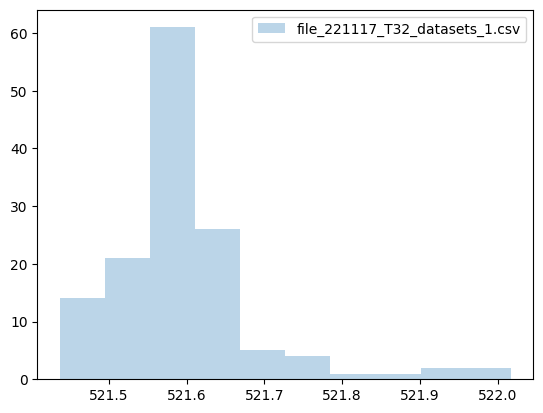

C:\Hobbies\programming\T32\file_221128_T32_datasets_1.csv
521.494
521.627109489051


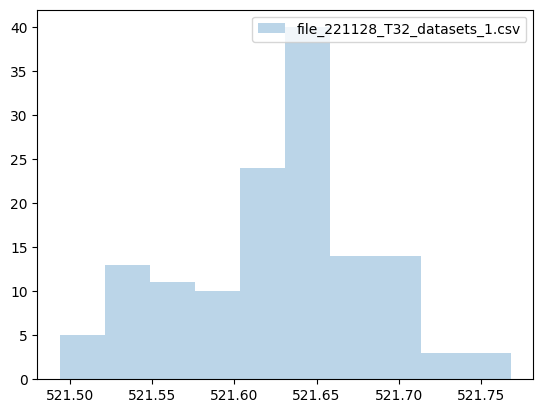

C:\Hobbies\programming\T32\file_230119_T32_datasets_1.csv
521.532
521.6833868613138


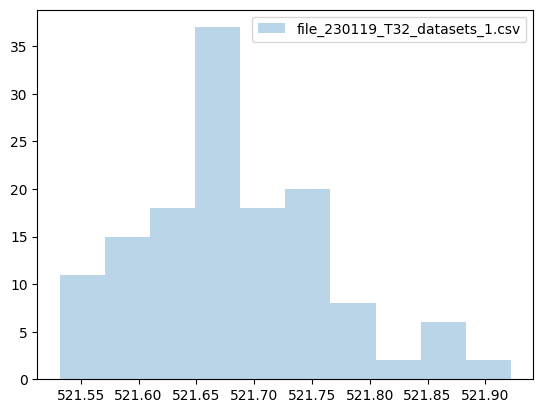

In [12]:
#Histogram comparing the frequency of Z values of one specified grave for all processed flights. Adjust the number
# in Flight_file path name to select resolution
datasetname = "datasets_1"
#dataset = eval(datasetname)
Grave = 'T32'
Tomb = Path('C:/Hobbies/programming/' + Grave)
Flight_files = Tomb.glob('file_*_'+datasetname+'.csv')
for Flight_file in Flight_files: 
    if 'file_220829' in Flight_file.name: 
        continue
    dataset = pd.read_csv(Flight_file)
    plt.hist(dataset['z'], label = Flight_file.name, alpha = 0.3)
    #comment out below if you want overlapping histograms
    print(Flight_file)
    print(dataset['z'].min())
    print(dataset['z'].mean())
    plt.legend()
    plt.show()
    
    
#plt.legend()

(array([24., 30., 29., 38., 18.,  4.,  6.,  5.,  5.,  1.]),
 array([521.398 , 521.4498, 521.5016, 521.5534, 521.6052, 521.657 ,
        521.7088, 521.7606, 521.8124, 521.8642, 521.916 ]),
 <BarContainer object of 10 artists>)

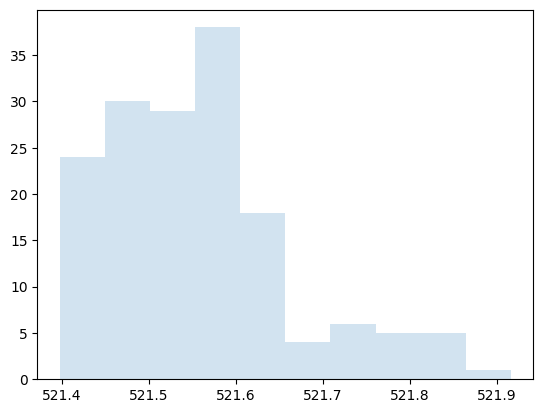

In [13]:
#Histogram of frequency of Z values of one specific grave during one specific flight
Grave = 'T31'
Flight = '221128'
Datasetname = "datasets_1"
Tomb = Path("C:/Hobbies/programming/" + Grave)
Flight_file = Tomb / ("file_" + Flight + '_' + Grave + '_' + Datasetname + ".csv")
dataset = pd.read_csv(Flight_file)
plt.hist(dataset['z'], label = Flight_file.name, alpha = 0.2)

In [14]:
def file_difference(data1, data2):
    zdif = data1.set_index(['x', 'y']).z - data2.set_index(['x', 'y']).z    
    return zdif

def difference_file_name(tag1, tag2):
    return "height_differences_" + tag1 + "_" + tag2 + "_" + datasetname + ".csv"

def save_height_difference(tag1, tag2):
    file_difference(dataset[tag1], dataset[tag2]).to_csv(difference_file_name(tag1, tag2))

In [15]:
def difference_file_name(tag1, tag2):
    return "height_differences_" + tag1 + "_" + tag2 + ".csv"

In [6]:
file1 = "file_220905"
file2 = "file_220829"

zdiff = pd.read_csv(difference_file_name(file1, file2))

grid = zdiff.reset_index().pivot_table(columns='grid_x', index='grid_y', values='z')

FileNotFoundError: [Errno 2] No such file or directory: 'height_differences_file_220905_file_220829.csv'

In [51]:
#Differences in z value between a reference and all other flights for one specified grave
Grave = 'T32'
Tomb = Path('C:/Hobbies/programming/' + Grave)
ref = '220829_r'
datasetname = 'datasets_1'
reference_file = Tomb / ('file_220829_r_' + Grave + '_' + datasetname + '.csv')
reference = pd.read_csv(reference_file)
z_dif = {}
Flight_files = Tomb.glob('file_*')

for Flight_file in Flight_files:    
    if ref in Flight_file.name: 
        continue
    file = pd.read_csv(Flight_file)    
    dif = file_difference(reference, file)
    dif.to_csv('C:/Hobbies/programming/'+Grave+'/zdif_' + ref + '_' + Flight_file.name.split('_')[1] + '_' + Grave + '_' + datasetname  +'.csv')


In [52]:
#Create a dataframe including the following information per grave: tomb name, mean z dif, max z dif, min z dif, 
#time since burial, category of tomb, depth of tomb.
datasetname = 'datasets_1'
Graves = [f'T{num:02}' for num in range(1, 33)]
x = pd.read_csv('C:/Hobbies/programming/data/timeline.csv')
timeline = x.set_index("flight_date")['days_since_burial'] 
stats_per_grave = []

grave_data = pd.read_csv('data/grave_data.csv')
grave_data = pd.DataFrame(grave_data)

for grave in Graves:
    Tomb = Path('C:/Hobbies/programming/' + grave)
    zdif_files = Tomb.glob('zdif_*_'+datasetname+'.csv') 
    stats = pd.DataFrame()
    mean = {}
    median= {}
    maxx = {}
    minn = {}
    time = {}
    tomb = {}
    category = {}
    depth = {}
    for zdif_file in zdif_files:
        if '_220829_r_220829' in zdif_file.name:
            continue
        file = pd.read_csv(zdif_file)
        mean[zdif_file.name] = file['z'].median()
        median[zdif_file.name] =file['z'].mean()
        maxx[zdif_file.name] =file['z'].max()
        minn[zdif_file.name] =file['z'].min()
        time[zdif_file.name] = timeline[int(zdif_file.name.split('_')[3])]
        tomb[zdif_file.name] = grave
        category[zdif_file.name] = grave_data[grave_data['Grave'] == zdif_file.name.split('_')[4]]['Notes'].values[0] 
        depth[zdif_file.name] = grave_data[grave_data['Grave'] == zdif_file.name.split('_')[4]]['Depth_cm'].values[0] 
    stats['grave'] = tomb
    stats['mean'] = mean
    stats['median'] =median
    stats['maxx'] = maxx
    stats['minn'] = minn
    stats['time'] = time
    stats['category'] = category
    stats['depth'] = depth
    stats_per_grave.append(stats)
    #print(depth)


stats_per_grave_df = pd.concat(stats_per_grave)   
print(stats_per_grave_df[stats_per_grave_df['grave']=="T31"])    


                                        grave    mean    median   maxx   minn   
zdif_220829_r_220905_T31_datasets_1.csv   T31  0.0180  0.018688  0.055 -0.026  \
zdif_220829_r_220912_T31_datasets_1.csv   T31  0.2245  0.211762  0.358  0.014   
zdif_220829_r_220927_T31_datasets_1.csv   T31  0.3030  0.282288  0.449  0.056   
zdif_220829_r_221011_T31_datasets_1.csv   T31  0.3030  0.293550  0.453  0.046   
zdif_220829_r_221020_T31_datasets_1.csv   T31  0.2785  0.269594  0.426  0.018   
zdif_220829_r_221101_T31_datasets_1.csv   T31  0.3210  0.303663  0.470 -0.018   
zdif_220829_r_221117_T31_datasets_1.csv   T31  0.3660  0.354331  0.530  0.076   
zdif_220829_r_221128_T31_datasets_1.csv   T31  0.3215  0.311256  0.479 -0.046   
zdif_220829_r_230119_T31_datasets_1.csv   T31  0.2765  0.240556  0.335 -0.040   

                                         time category  depth  
zdif_220829_r_220905_T31_datasets_1.csv     7    grave  200.0  
zdif_220829_r_220912_T31_datasets_1.csv    14    grave  200.0

Text(0, 0.5, 'z difference (m)')

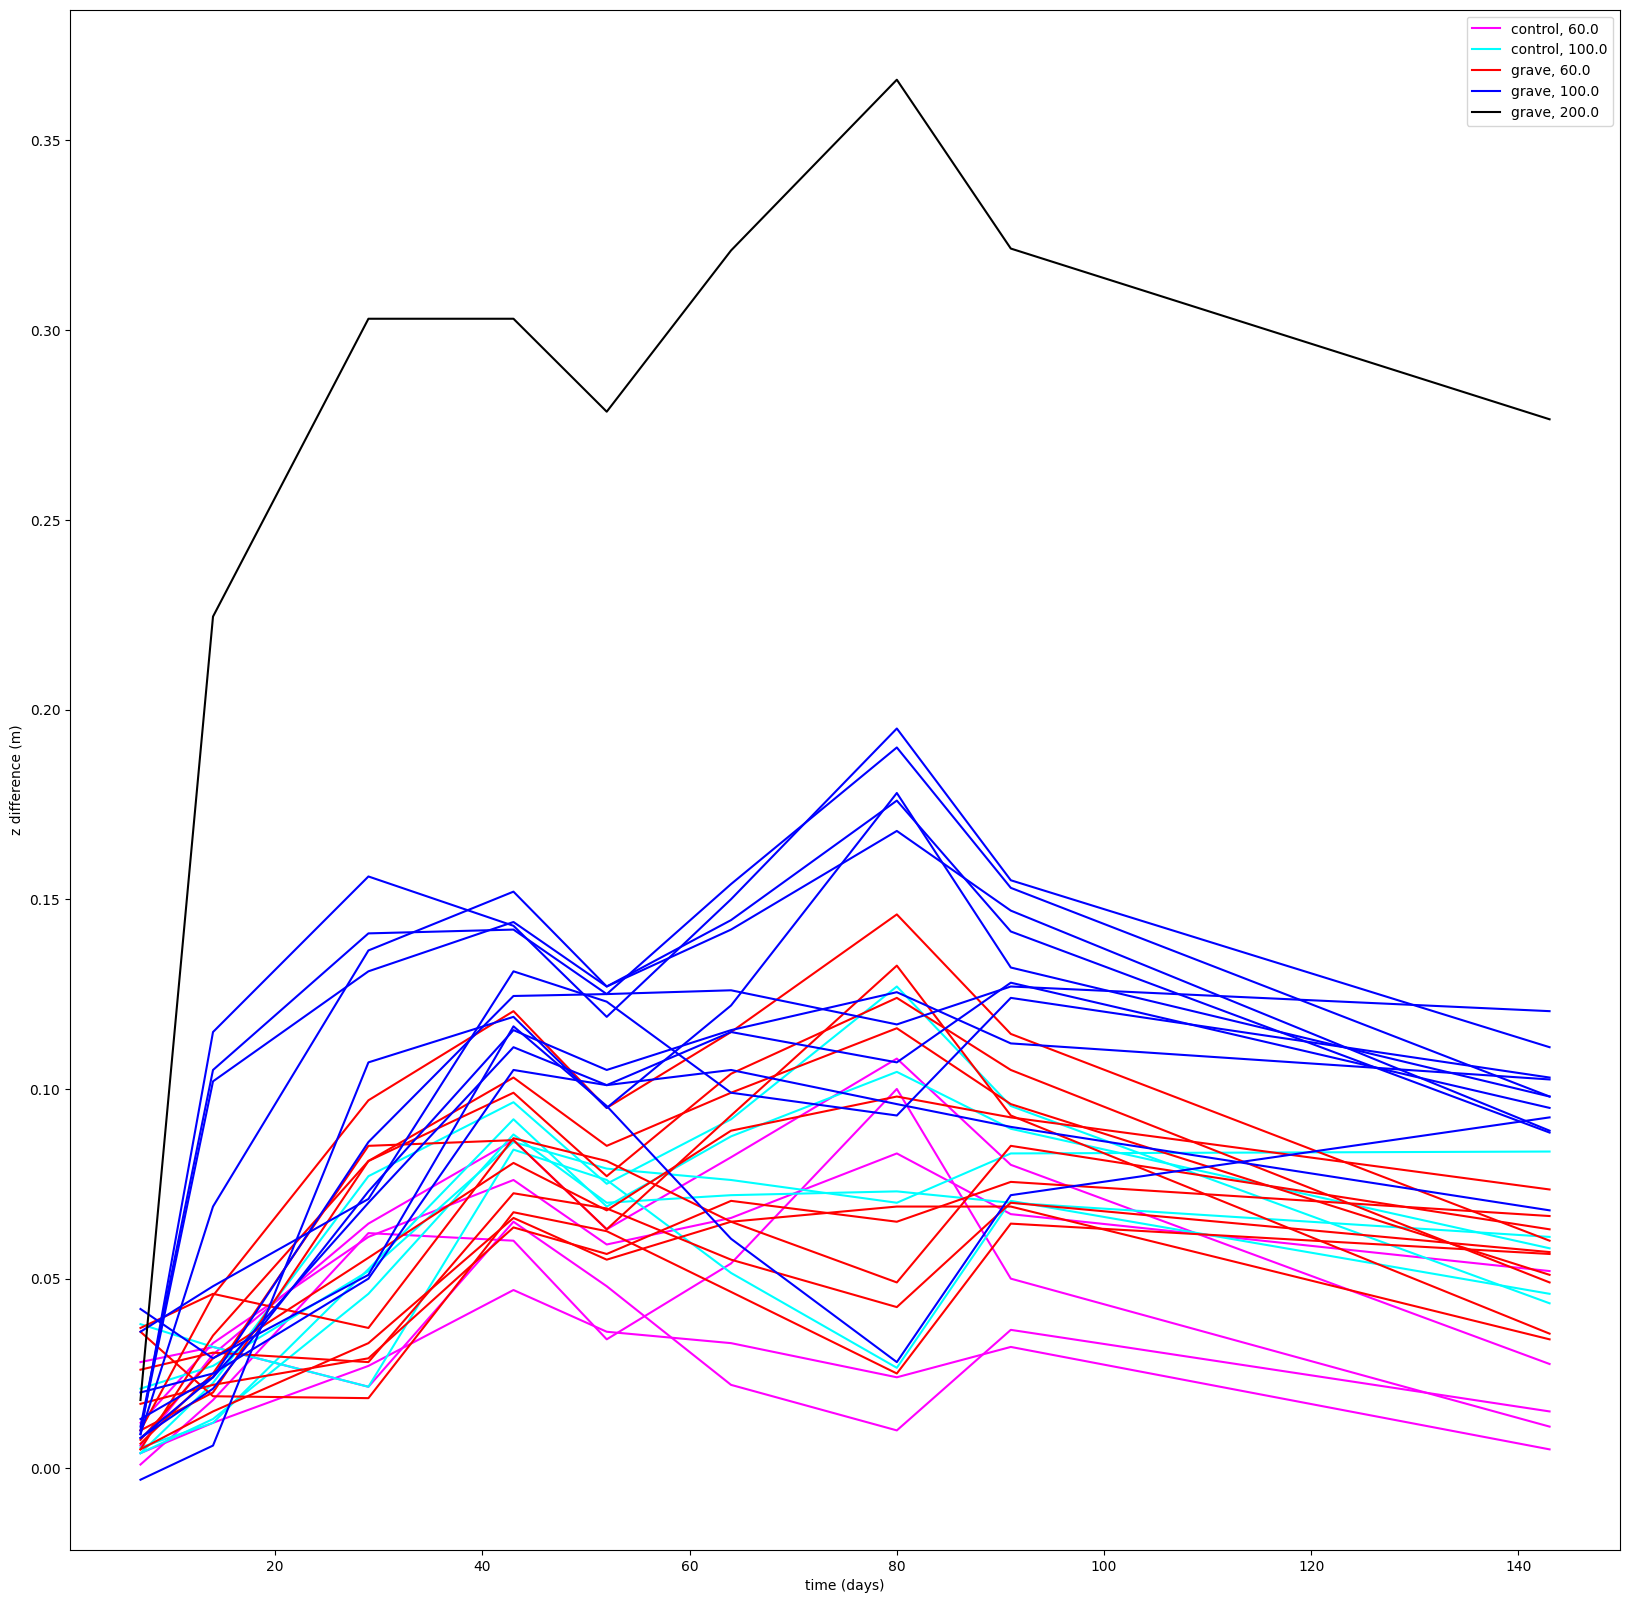

In [53]:
#Visualise all graves together over time

plt.figure(figsize = [20, 20])  
for (category, depth), stats in stats_per_grave_df.groupby(['category', 'depth']):
    #stats=stats_per_grave_df[stats_per_grave_df['category'] == category & stats_per_grave_df['depth'] == depth]
    if category == 'grave' and depth == 100:
        colour = 'b'
    elif category == 'control' and depth == 100:
        colour = 'cyan'
    elif category == 'grave' and depth == 60:
        colour = 'r'
    elif category == 'control' and depth == 60:
        colour = 'magenta'
    else:
        colour = 'k'
    label=f"{category}, {depth}"
    is_first = True
    for grave, grave_stats in stats.groupby('grave'):    
        plt.plot(grave_stats['time'], grave_stats['mean'], color= colour, label = label if is_first else None)
        is_first = False
plt.legend()
plt.xlabel('time (days)')
plt.ylabel('z difference (m)')

#plt.savefig('figures/mean_z_difference_over_time.png')




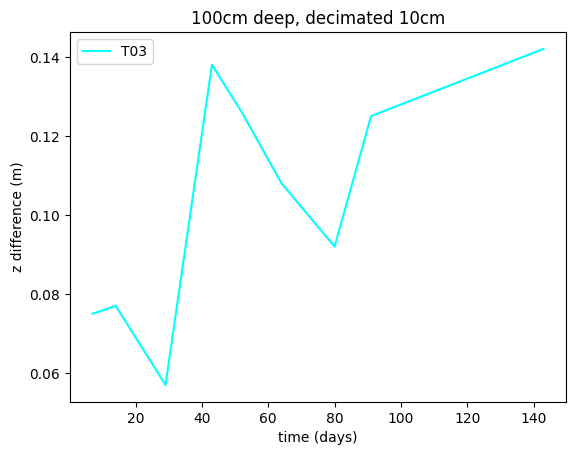

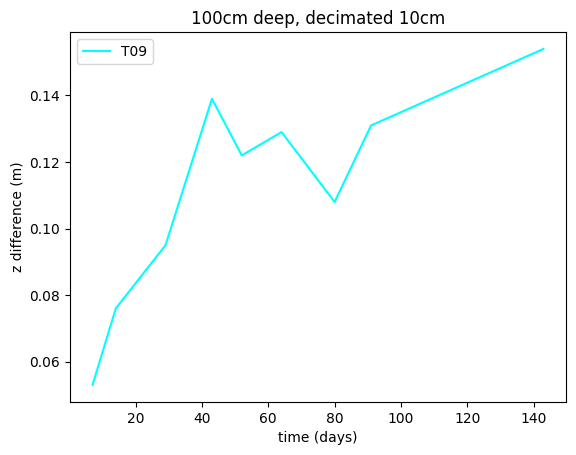

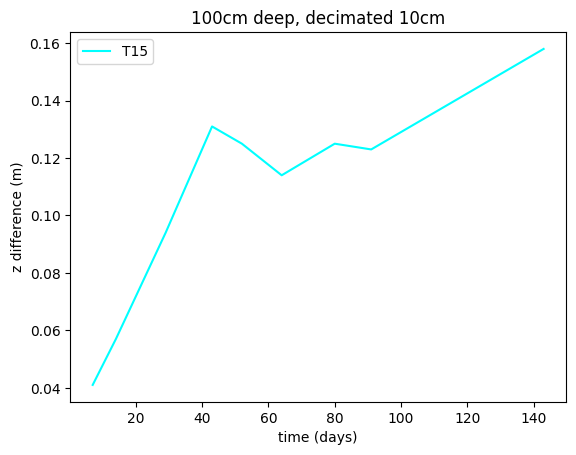

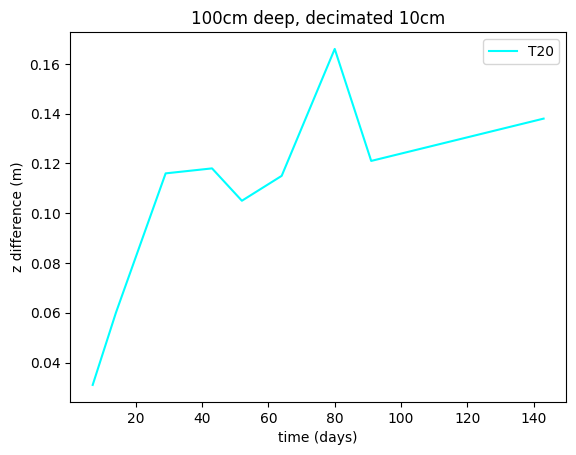

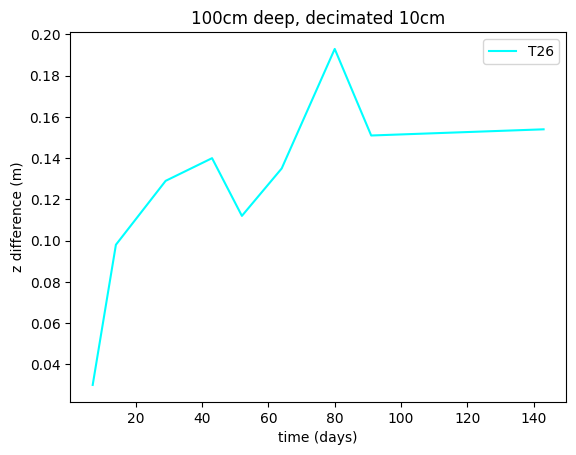

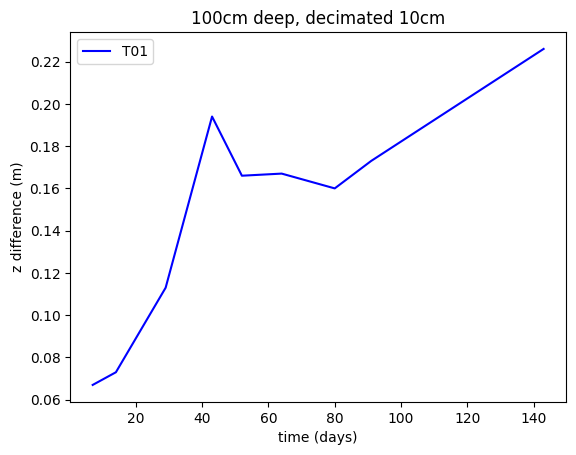

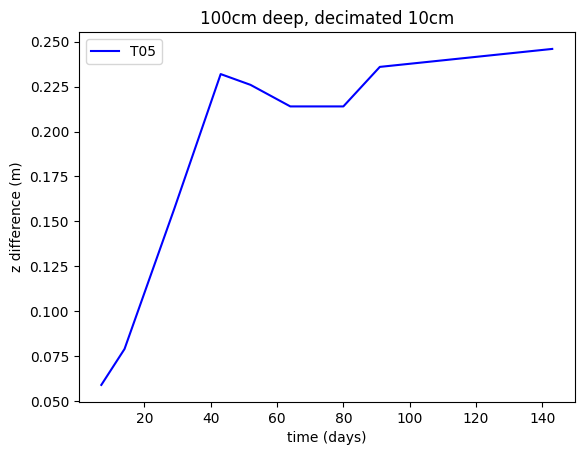

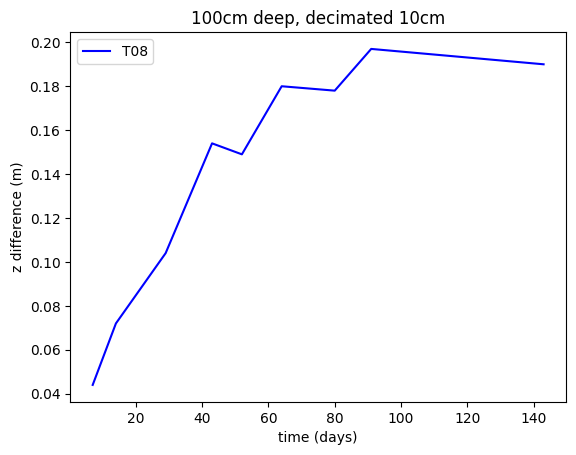

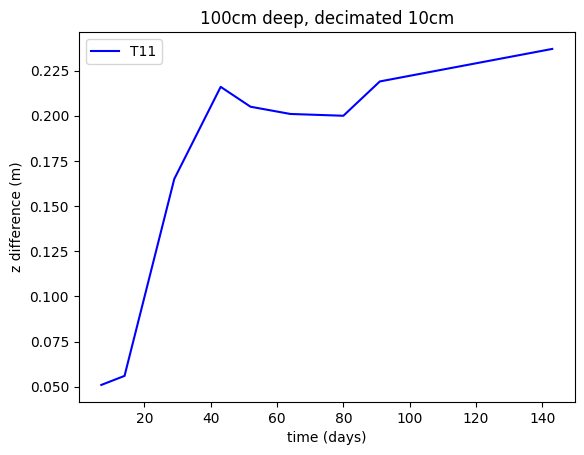

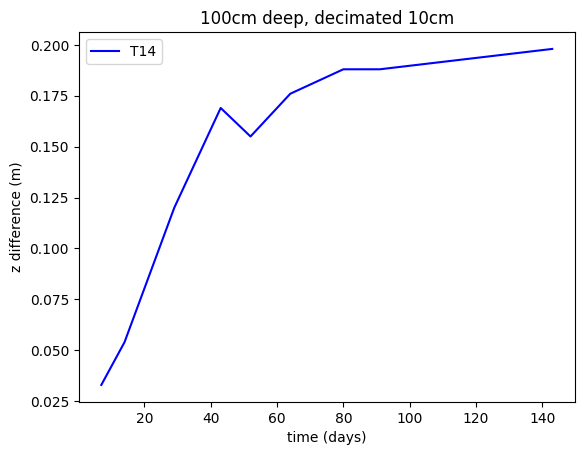

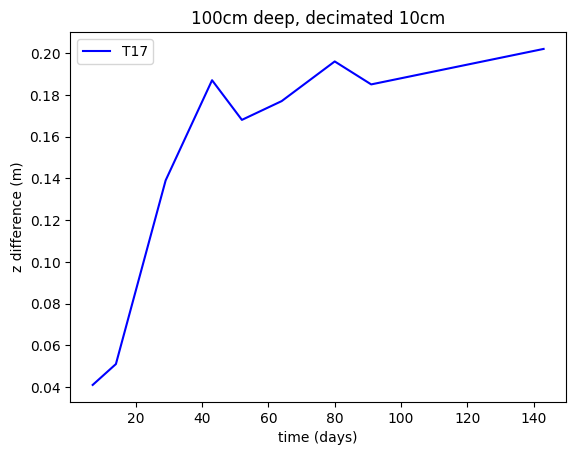

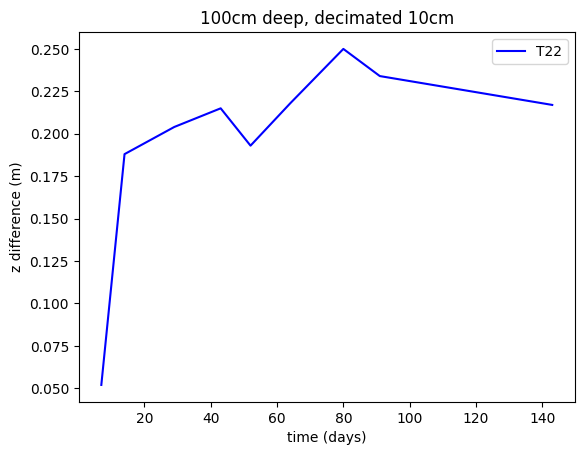

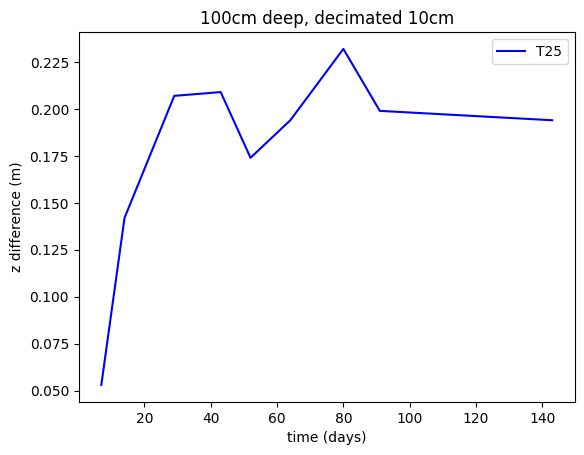

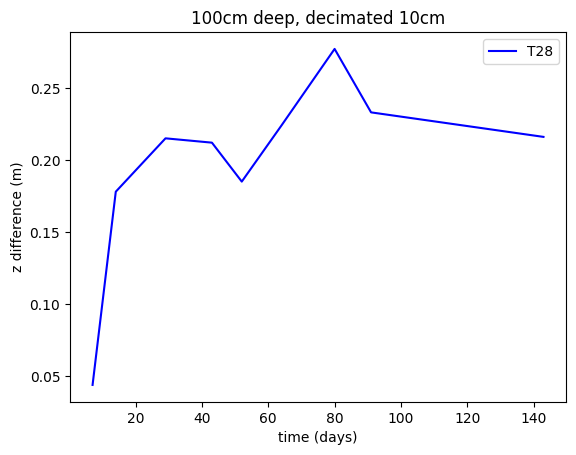

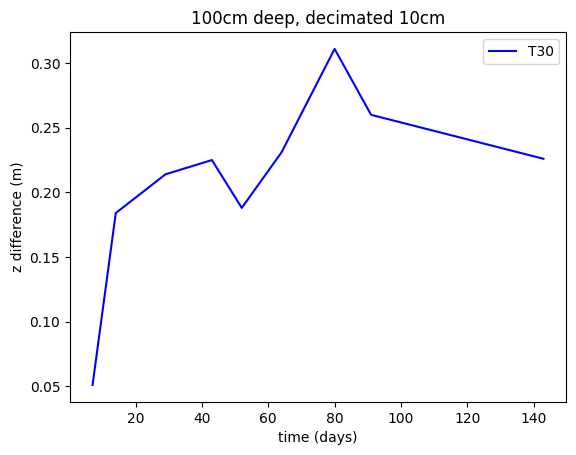

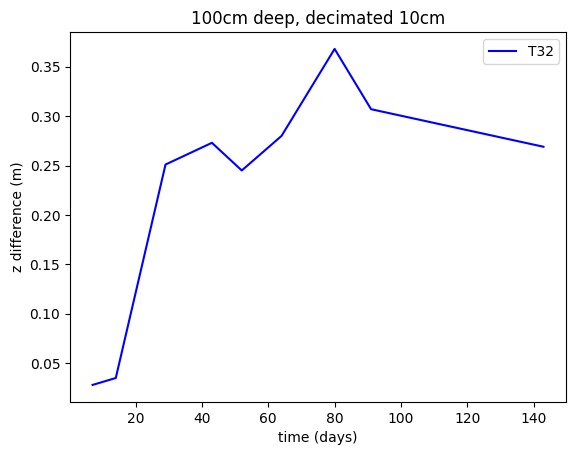

In [59]:
#plot showing all graves and controls with a depth of 100cm, split into two colour categories - graves and controls.
#plt.figure(figsize = [20, 20])  
for (category, depth), stats in stats_per_grave_df.groupby(['category', 'depth']):
    #stats=stats_per_grave_df[stats_per_grave_df['category'] == category & stats_per_grave_df['depth'] == depth]
    if category == 'grave' and depth == 100:
        colour = 'b'
    elif category == 'control' and depth == 100:
        colour = 'cyan'
    elif category == 'grave' and depth == 60:
        colour = 'r'
    elif category == 'control' and depth == 60:
        colour = 'magenta'
    else:
        colour = 'k'

    for (grave), grave_stats in stats.groupby('grave'):   
        if depth == 60:
            continue
        if depth == 200:
            continue
        label=f"{grave}"
        plt.plot(grave_stats['time'], grave_stats['maxx'], color = colour, label = label)
        plt.legend()
        plt.title('100cm deep, decimated 10cm')
        plt.xlabel('time (days)')
        plt.ylabel('z difference (m)')
        #plt.savefig('figures/zdif_' + grave + '_100cm_10cm')
        plt.show()





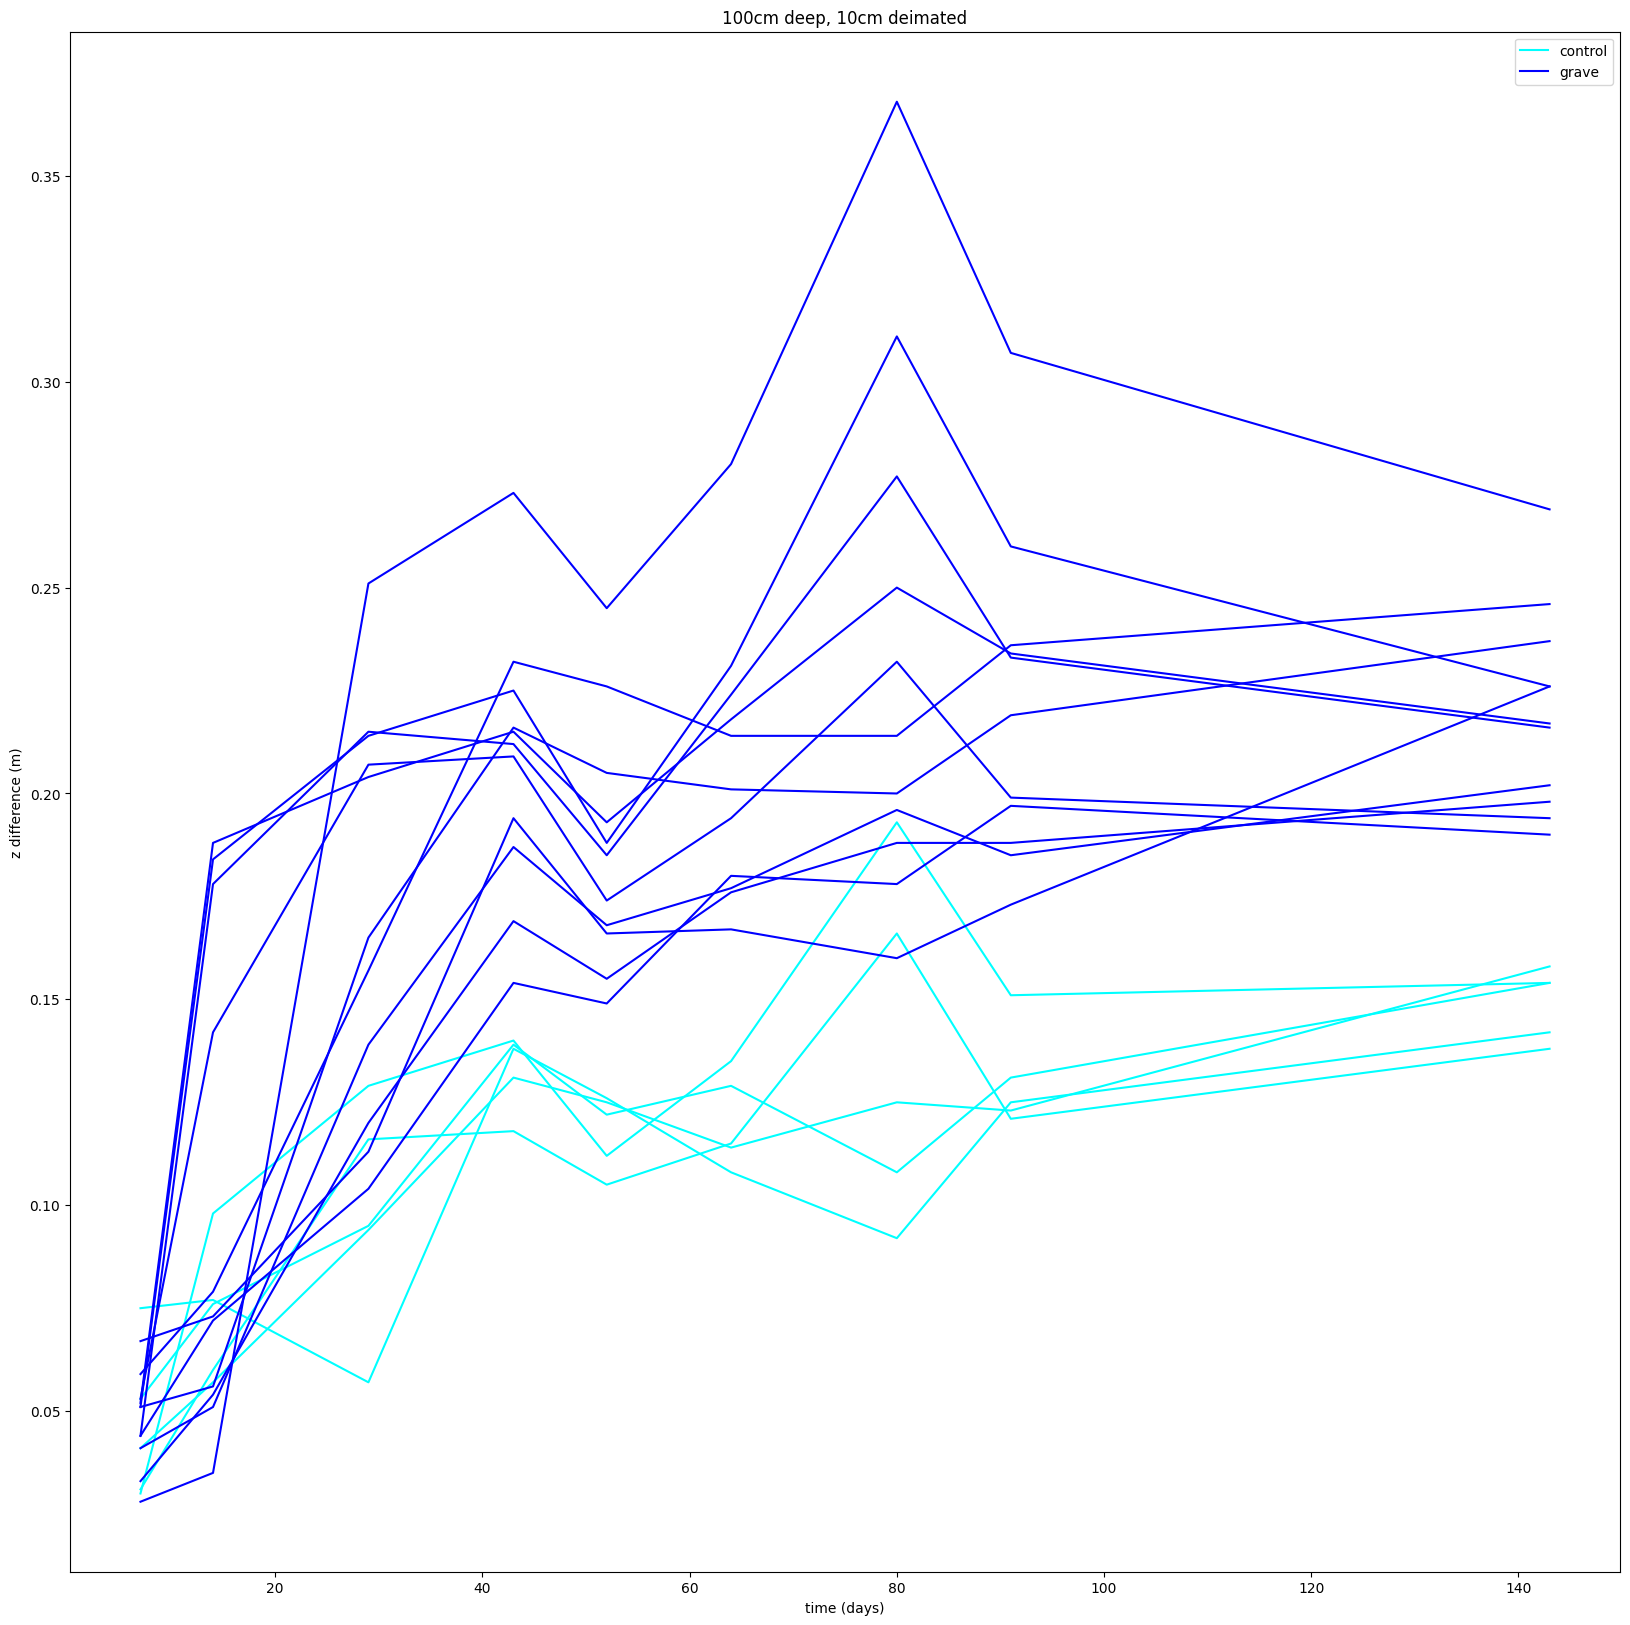

In [61]:
#plot showing all graves and controls with a depth of 100cm, split into two colour categories - graves and controls.
plt.figure(figsize = [20, 20])  
for (category, depth), stats in stats_per_grave_df.groupby(['category', 'depth']):
    #stats=stats_per_grave_df[stats_per_grave_df['category'] == category & stats_per_grave_df['depth'] == depth]
    if category == 'grave' and depth == 100:
        colour = 'b'
    elif category == 'control' and depth == 100:
        colour = 'cyan'
    elif category == 'grave' and depth == 60:
        colour = 'r'
    elif category == 'control' and depth == 60:
        colour = 'magenta'
    else:
        colour = 'k'
    label=f"{category}"
    is_first = True
    for (grave), grave_stats in stats.groupby('grave'):   
        if depth == 60:
            continue
        if depth == 200:
            continue       
        plt.plot(grave_stats['time'], grave_stats['maxx'], color= colour, label = label if is_first else None)
        is_first = False
plt.legend()
plt.xlabel('time (days)')
plt.ylabel('z difference (m)')
plt.title('100cm deep, 10cm deimated')
#plt.savefig('figures/zdif_per_grave_100cm_10cm')


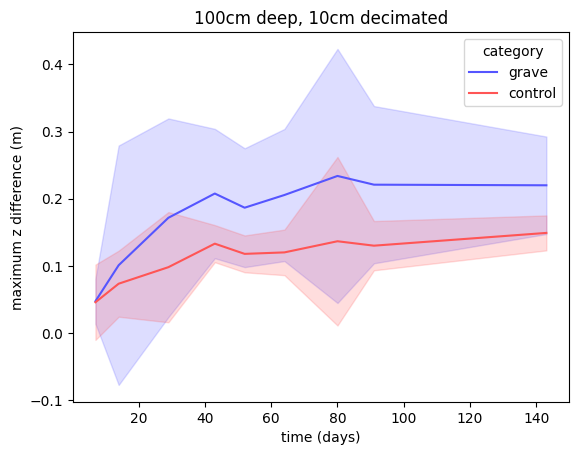

In [62]:
#plot of the averge of all max z difs of all graves over time, with a standard deviation of 3 shown
sns.lineplot(stats_per_grave_df[stats_per_grave_df['depth'] == 100], x='time', y='maxx', hue='category', palette = 'seismic', errorbar = ('sd',3))
plt.xlabel('time (days)')
plt.ylabel('maximum z difference (m)')
plt.title('100cm deep, 10cm decimated')
plt.savefig('figures/zdif_maxz_control_vs_grave_100cm_10cm')

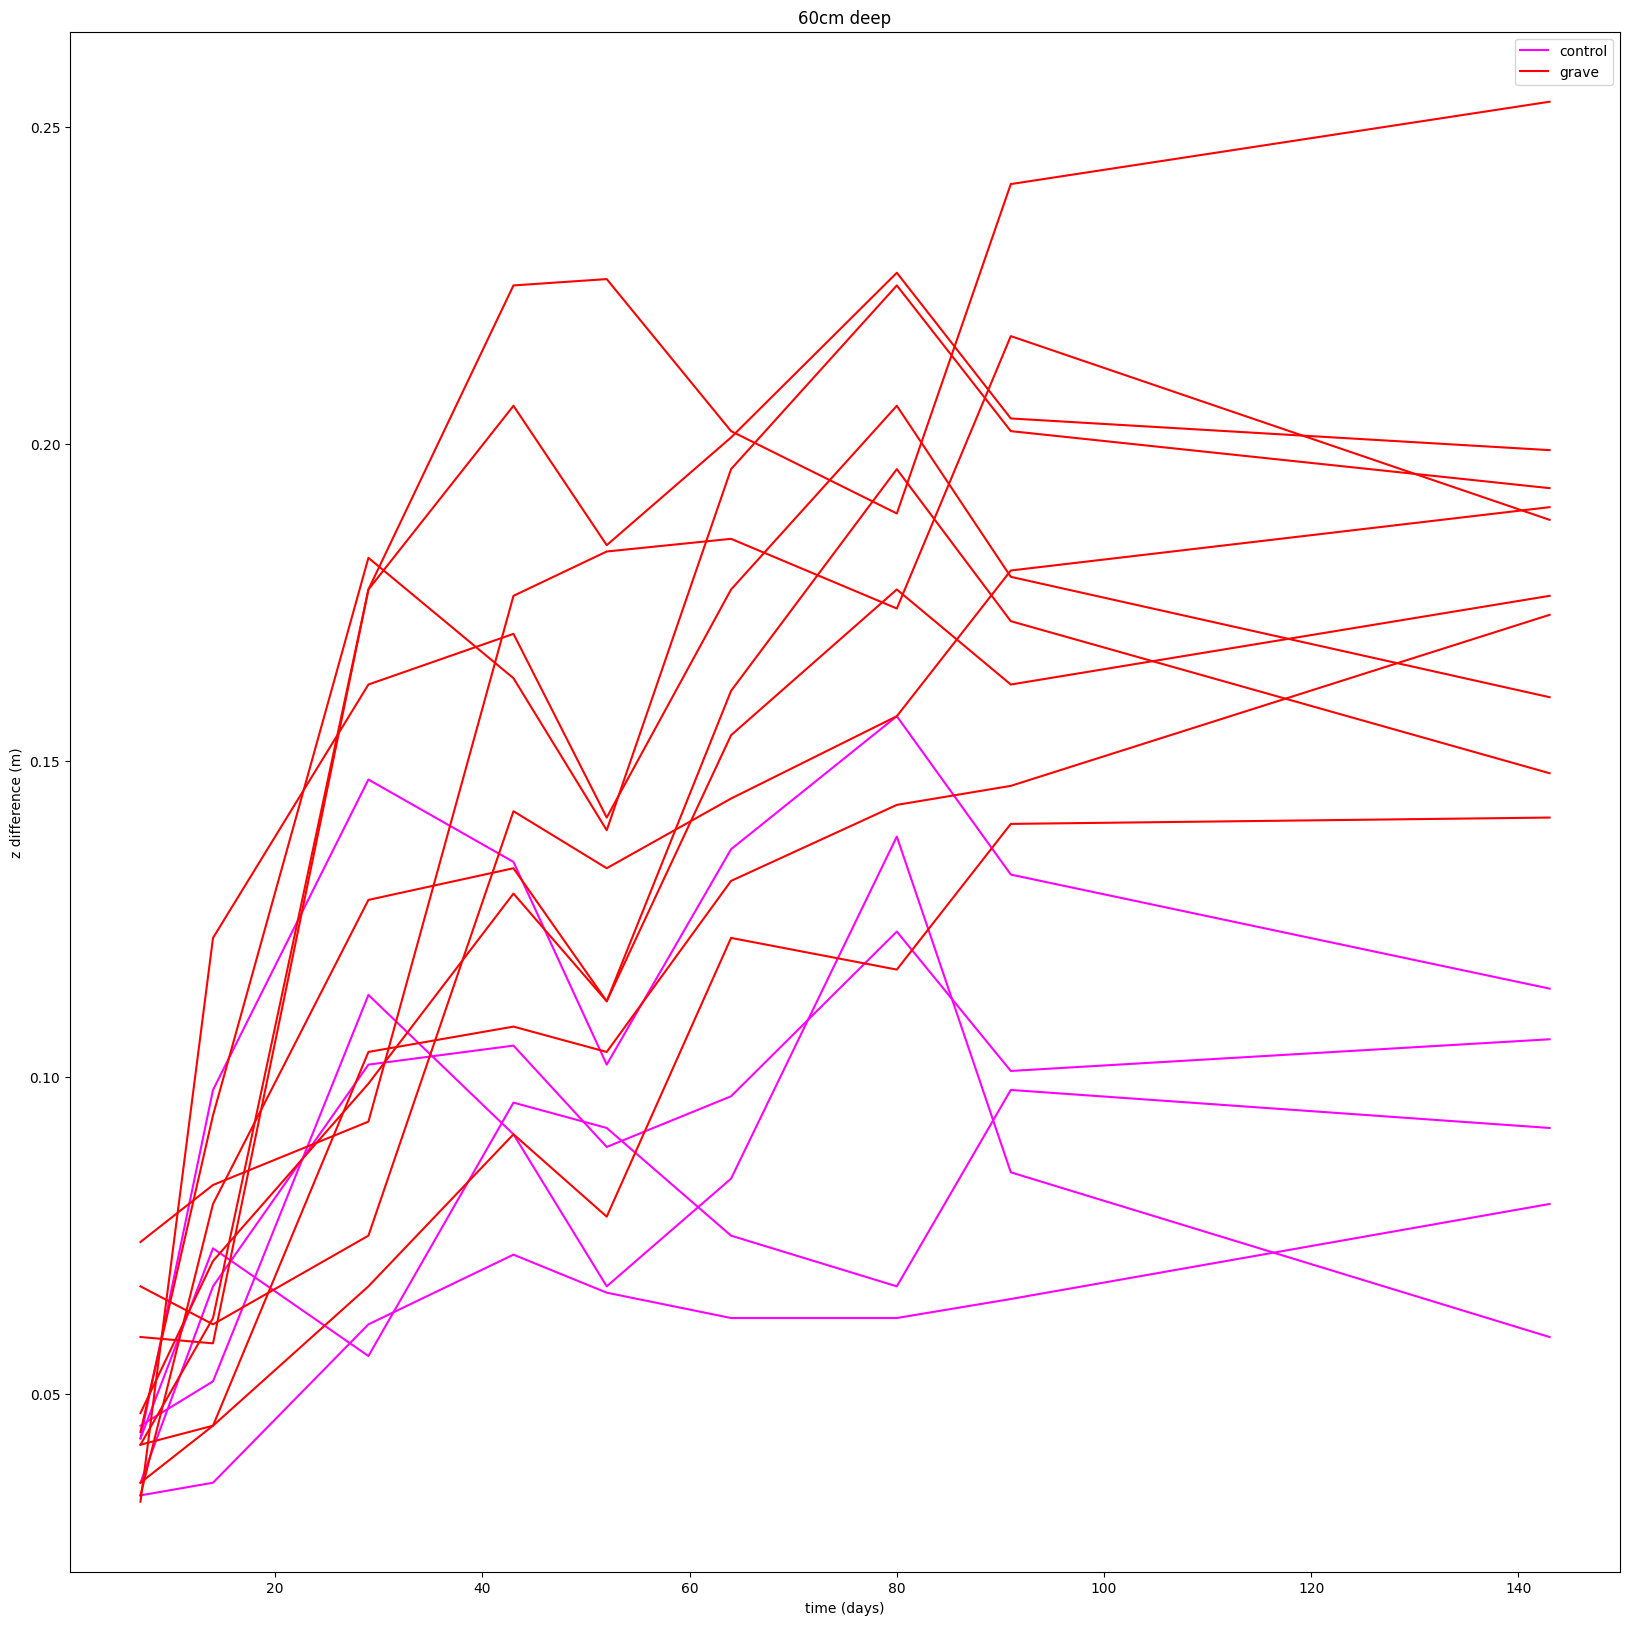

In [63]:
#plot showing all graves and controls with a depth of 60cm, split into two colour categories - graves and controls.
plt.figure(figsize = [20, 20])  
for (category, depth), stats in stats_per_grave_df.groupby(['category', 'depth']):
    #stats=stats_per_grave_df[stats_per_grave_df['category'] == category & stats_per_grave_df['depth'] == depth]
    if category == 'grave' and depth == 100:
        colour = 'b'
    elif category == 'control' and depth == 100:
        colour = 'cyan'
    elif category == 'grave' and depth == 60:
        colour = 'r'
    elif category == 'control' and depth == 60:
        colour = 'magenta'
    else:
        colour = 'k'
    label=f"{category}"
    is_first = True
    for (grave), grave_stats in stats.groupby('grave'):   
        if depth == 100:
            continue
        if depth == 200:
            continue       
        plt.plot(grave_stats['time'], grave_stats['maxx'], color= colour, label = label if is_first else None)
        is_first = False
plt.legend()
plt.xlabel('time (days)')
plt.ylabel('z difference (m)')
plt.title('60cm deep')

plt.savefig('figures/zdif_per_grave_60cm_10cm')

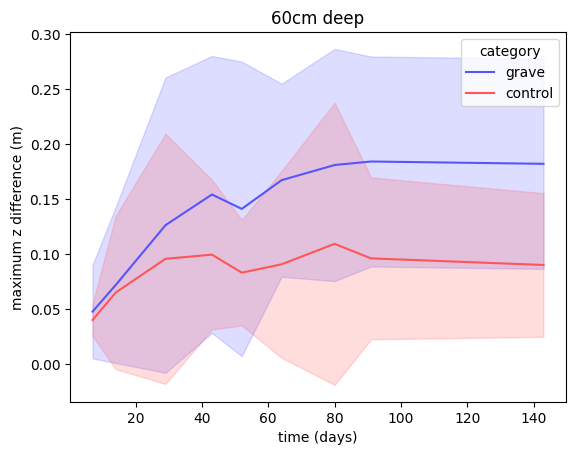

In [64]:
#plot of the averge of all max z difs of all graves over time, with a standard deviation of 3 shown
sns.lineplot(stats_per_grave_df[stats_per_grave_df['depth'] == 60], x='time', y='maxx', hue='category', palette = 'seismic', errorbar = ('sd',3))
plt.xlabel('time (days)')
plt.ylabel('maximum z difference (m)')
plt.title('60cm deep')
plt.savefig('figures/zdif_maxz_control_vs_grave_100cm_10cm')

<Axes: xlabel='time', ylabel='mean'>

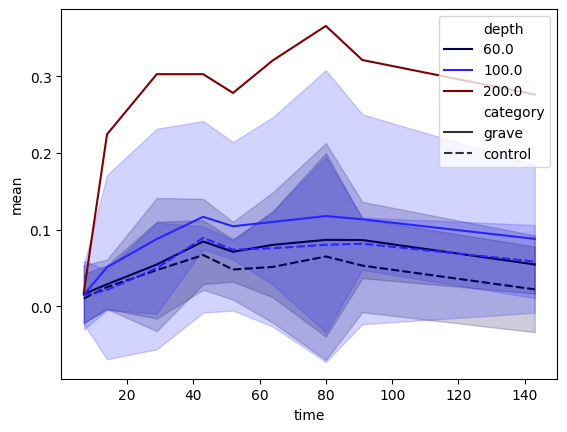

In [205]:
sns.lineplot(stats_per_grave_df, x='time', y='mean', hue='depth', style='category', palette = 'seismic', errorbar = ('sd',3))

Text(0.5, 1.0, '100cm deep')

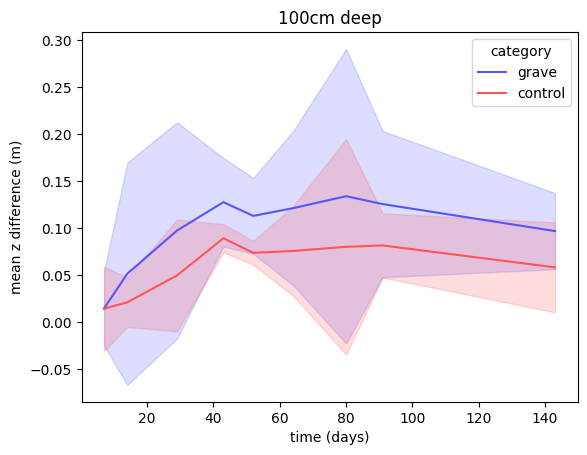

In [244]:
#plot of the averge of all mean z difs of all graves over time, with a standard deviation of 3 shown
sns.lineplot(stats_per_grave_df[stats_per_grave_df['depth'] == 100], x='time', y='mean', hue='category', palette = 'seismic', errorbar = ('sd',3))
plt.xlabel('time (days)')
plt.ylabel('mean z difference (m)')
plt.title('100cm deep')

Text(0.5, 1.0, '60cm deep')

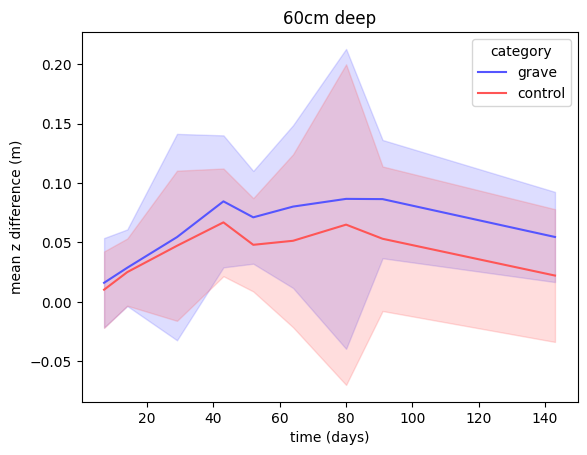

In [245]:
#plot of the averge of all mean z difs of all graves over time, with a standard deviation of 3 shown
sns.lineplot(stats_per_grave_df[stats_per_grave_df['depth'] == 60], x='time', y='mean', hue='category', palette = 'seismic', errorbar = ('sd', 3))
plt.xlabel('time (days)')
plt.ylabel('mean z difference (m)')
plt.title('60cm deep')

Text(0.5, 1.0, '100cm deep')

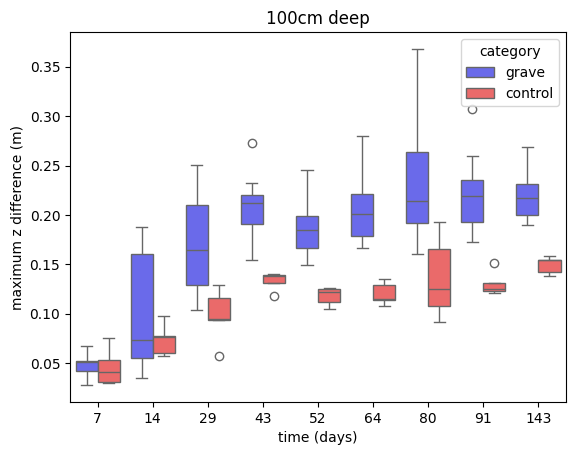

In [317]:
#plot of the averge of all max z difs of all graves over time, with a standard deviation of 3 shown
sns.boxplot(stats_per_grave_df[stats_per_grave_df['depth'] == 100], x='time', y='maxx', hue='category', palette = 'seismic')
plt.xlabel('time (days)')
plt.ylabel('maximum z difference (m)')
plt.title('100cm deep')

Text(0.5, 1.0, '60cm deep')

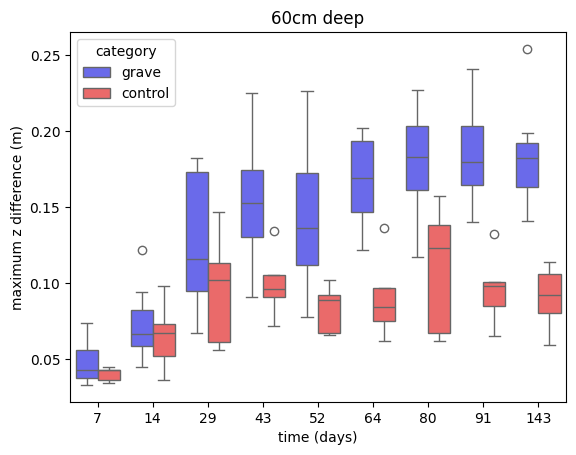

In [346]:
#plot of the averge of all max z difs of all graves over time, with a standard deviation of 3 shown
sns.boxplot(stats_per_grave_df[stats_per_grave_df['depth'] == 60], x='time', y='maxx', hue='category', palette = 'seismic')
plt.xlabel('time (days)')
plt.ylabel('maximum z difference (m)')
plt.title('60cm deep')

Text(0.5, 1.0, '100cm & 60cm deep')

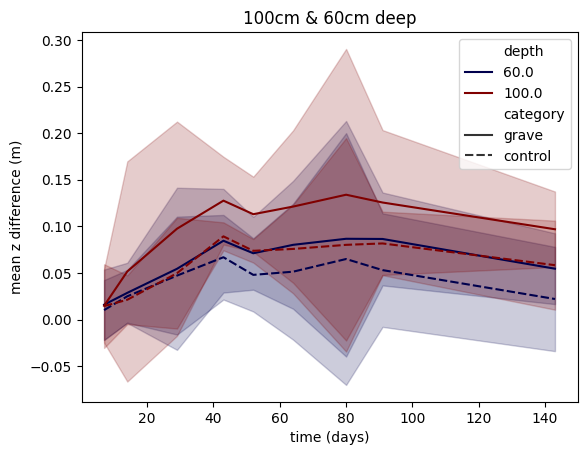

In [360]:
#plot of the averge of all mean z difs of all graves over time, with a standard deviation of 3 shown
sns.lineplot(stats_per_grave_df[np.logical_or(stats_per_grave_df['depth'] == 100, stats_per_grave_df['depth'] == 60)], 
             x='time', y='mean', hue=('depth'), style = 'category', palette = 'seismic', errorbar = ('sd',3))
plt.xlabel('time (days)')
plt.ylabel('mean z difference (m)')
plt.title('100cm & 60cm deep')

Text(0.5, 1.0, '100cm & 60cm deep')

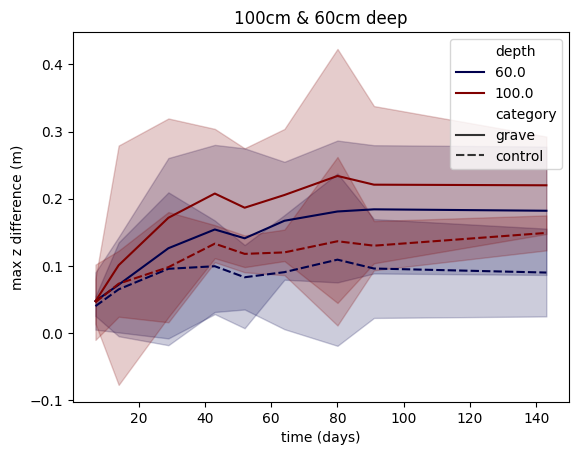

In [361]:
#plot of the averge of all max z difs of all graves over time, with a standard deviation of 3 shown
sns.lineplot(stats_per_grave_df[np.logical_or(stats_per_grave_df['depth'] == 100, stats_per_grave_df['depth'] == 60)], 
             x='time', y='maxx', hue=('depth'), style = 'category', palette = 'seismic', errorbar = ('sd',3))
plt.xlabel('time (days)')
plt.ylabel('max z difference (m)')
plt.title('100cm & 60cm deep')